# Time Series Decomposition

Time series decomposition is the process of breaking down a time series into its constituent components, namely the trend, seasonal component, and residual component. The trend component represents the long-term direction of the series, the seasonal component represents the repeating patterns over a fixed period of time (e.g. daily, weekly, monthly), and the residual component represents the remaining variability in the series that is not explained by the trend or seasonal components.

## Seasonal Decomposition

Seasonal decomposition is a classical method that separates a time series into its trend, seasonal, and residual components using a moving average or regression model. It assumes that the seasonal pattern is fixed and does not change over time. Seasonal decomposition is a simple and effective method for decomposing time series with regular and stable seasonal patterns.

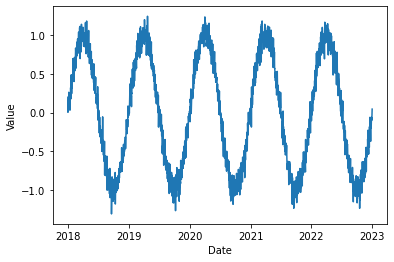

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a time series with yearly seasonality
np.random.seed(42) #ensures that the same random values are used each time the time series is generated, so you should get the same time series each time you run the code
dates = pd.date_range(start='2018-01-01', end='2022-12-31', freq='D')
values = np.sin(2 * np.pi * np.arange(len(dates)) /  (365)) + np.random.normal(scale=0.1, size=len(dates)) #the standard deviation of the normal distribution is 0.1
df = pd.DataFrame({'Value': values}, index=dates)

# Plot the time series
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


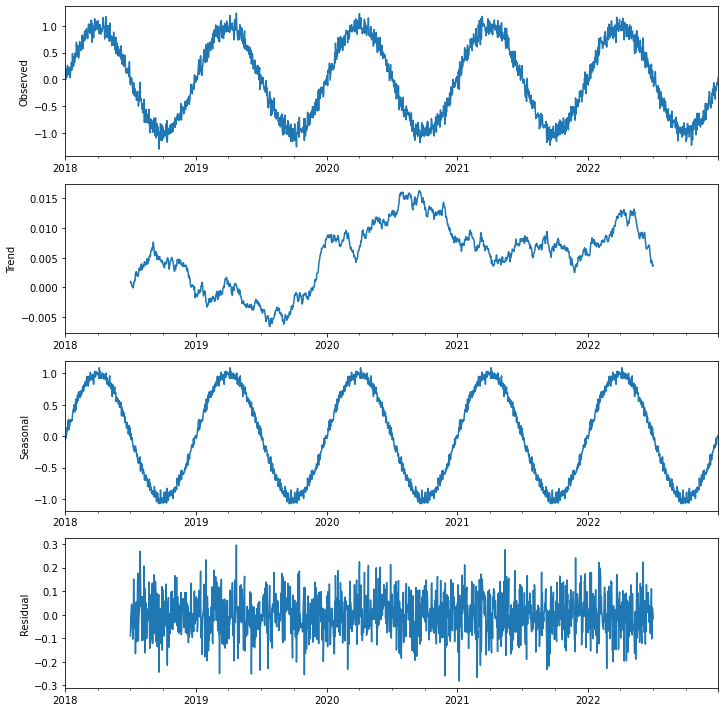

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Time series decomposition
result = seasonal_decompose(df['Value'], model='additive', period=365)

# Plot decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,10))
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()


Trend: The trend component of a time series captures the long-term changes in the level of the series. It can be modeled as a linear or nonlinear function of time, or as a combination of both. Common methods for estimating the trend include moving averages, regression analysis, and exponential smoothing.

Seasonality: The seasonal component of a time series captures the regular, repetitive patterns that occur at fixed intervals, such as daily, weekly, or yearly. Seasonality can be modeled using Fourier series, dummy variables, or other methods. The period of the seasonal component must be known or estimated in order to correctly identify and model it.

Residual: The residual component of a time series captures the random fluctuations that cannot be explained by the trend or seasonal components. It is often modeled as a white noise process, meaning that the residuals are uncorrelated and have constant variance.

### another example with two seasonalities

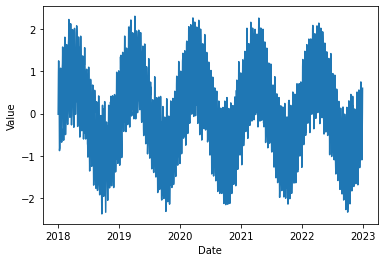

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# Define the time range
dates = pd.date_range(start='2018-01-01', end='2022-12-31', freq='D')

# Generate monthly seasonality signal
s_monthly = np.sin(2 * np.pi * np.arange(len(dates)) /  (12)) + np.random.normal(scale=0.1, size=len(dates)) #the standard deviation of the normal distribution is 0.1

# Generate yearly seasonality signal
s_yearly = np.sin(2 * np.pi * np.arange(len(dates)) /  (365)) + np.random.normal(scale=0.1, size=len(dates)) #the standard deviation of the normal distribution is 0.1


# Combine signals
values = s_monthly + s_yearly

# Add some random noise to the values
values += np.random.normal(scale=0.1, size=len(dates))

# Create the DataFrame
df = pd.DataFrame({'Value': values}, index=dates)

# Plot the time series
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

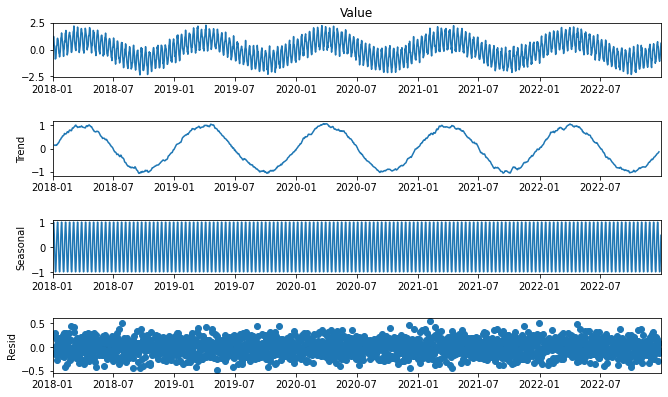

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Time series decomposition
result = seasonal_decompose(df['Value'], model='additive', period=12)

# Plot decomposition
fig = result.plot()
fig.set_size_inches(10, 6)

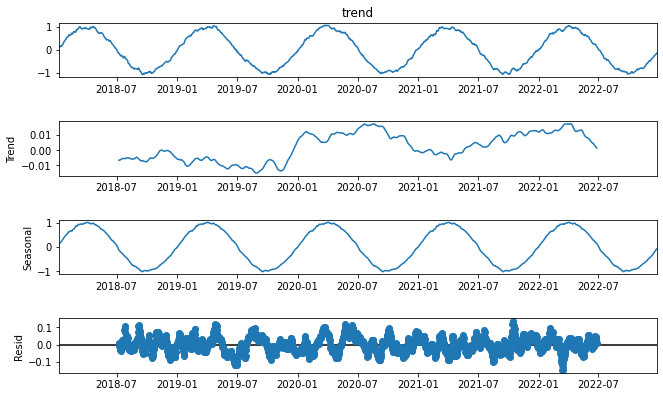

In [66]:
# Time series decomposition
trend = result.trend
trend = trend.dropna()
result_2 = seasonal_decompose(trend, model='additive',period=365)

# Plot decomposition
fig = result_2.plot()
fig.set_size_inches(10, 6)

## Seasonal-Trend Decomposition Procedure based on Loess (STL)

Seasonal-Trend Decomposition Procedure based on Loess (STL) is a method for decomposing a time series into three components: a seasonal component, a trend component, and a residual component. STL can handle time series with complex seasonal patterns that may change over time.

### CO2 example

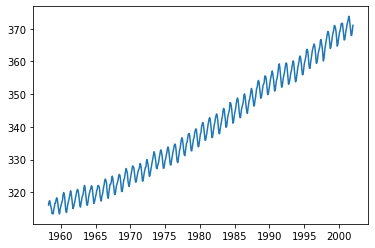

In [51]:
from statsmodels.datasets import co2
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Load the co2 dataset
data = co2.load_pandas().data
data = data.resample('M').mean()
data = data.interpolate()

plt.plot(data)

Trying to decompose this data usign "seasonal_decompose"

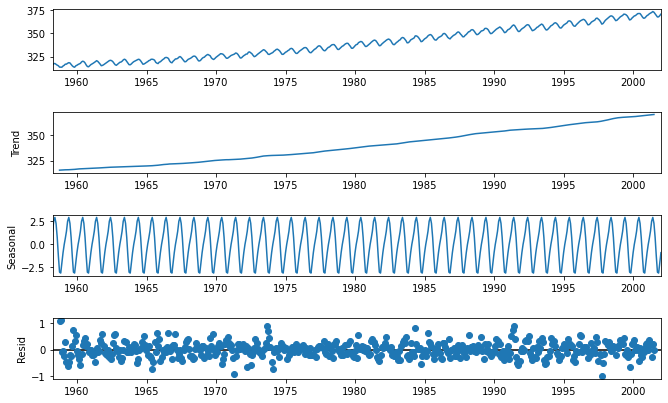

In [54]:
result = seasonal_decompose(data, model='additive')
# Plot decomposition
fig = result.plot()
fig.set_size_inches(10, 6)

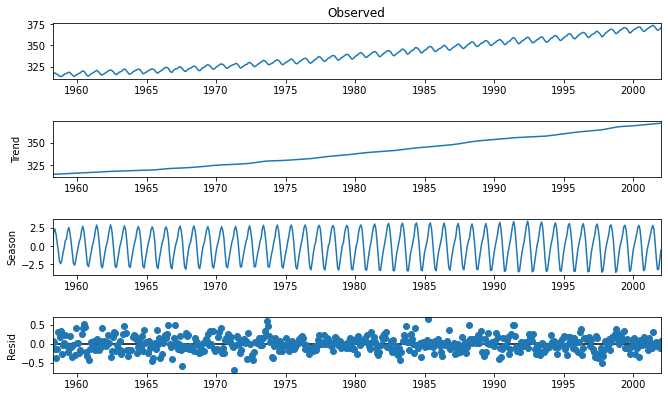

In [50]:
# Perform STL decomposition
stl = STL(data)
res = stl.fit()

fig = res.plot()
fig.set_size_inches(10, 6)